In [ ]:
#520H0583_Huynh Tran Minh Tien
#520H0589_Nguyen Trung Tin
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Car_data = pd.read_csv("/content/gdrive/Shareddrives/Machine Learning Car Price Predict/Dataset/car_data.csv")

In [ ]:
Car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# EDA

In [ ]:
#Checking number of rows and columns
Car_data.shape

(301, 9)

In [ ]:
# Info about data
Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
Car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(Car_data.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


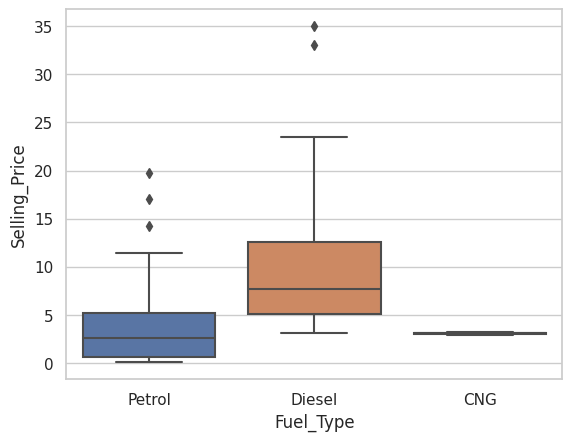

In [ ]:
# Vẽ đồ thị boxplot để xem phân phối của giá bán (Selling_Price) theo loại nhiên liệu (Fuel_Type)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=Car_data)
plt.show()

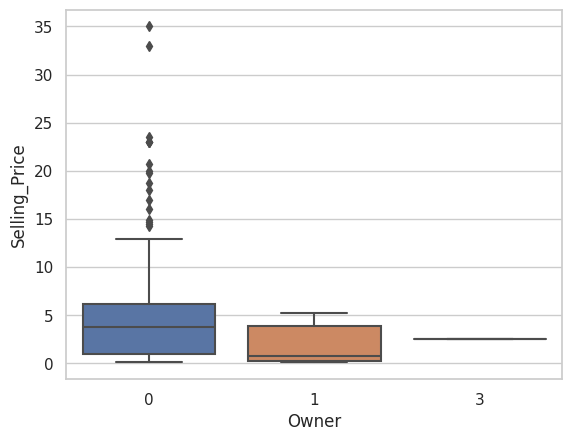

In [ ]:
sns.boxplot(x='Owner', y='Selling_Price', data=Car_data)
plt.show()

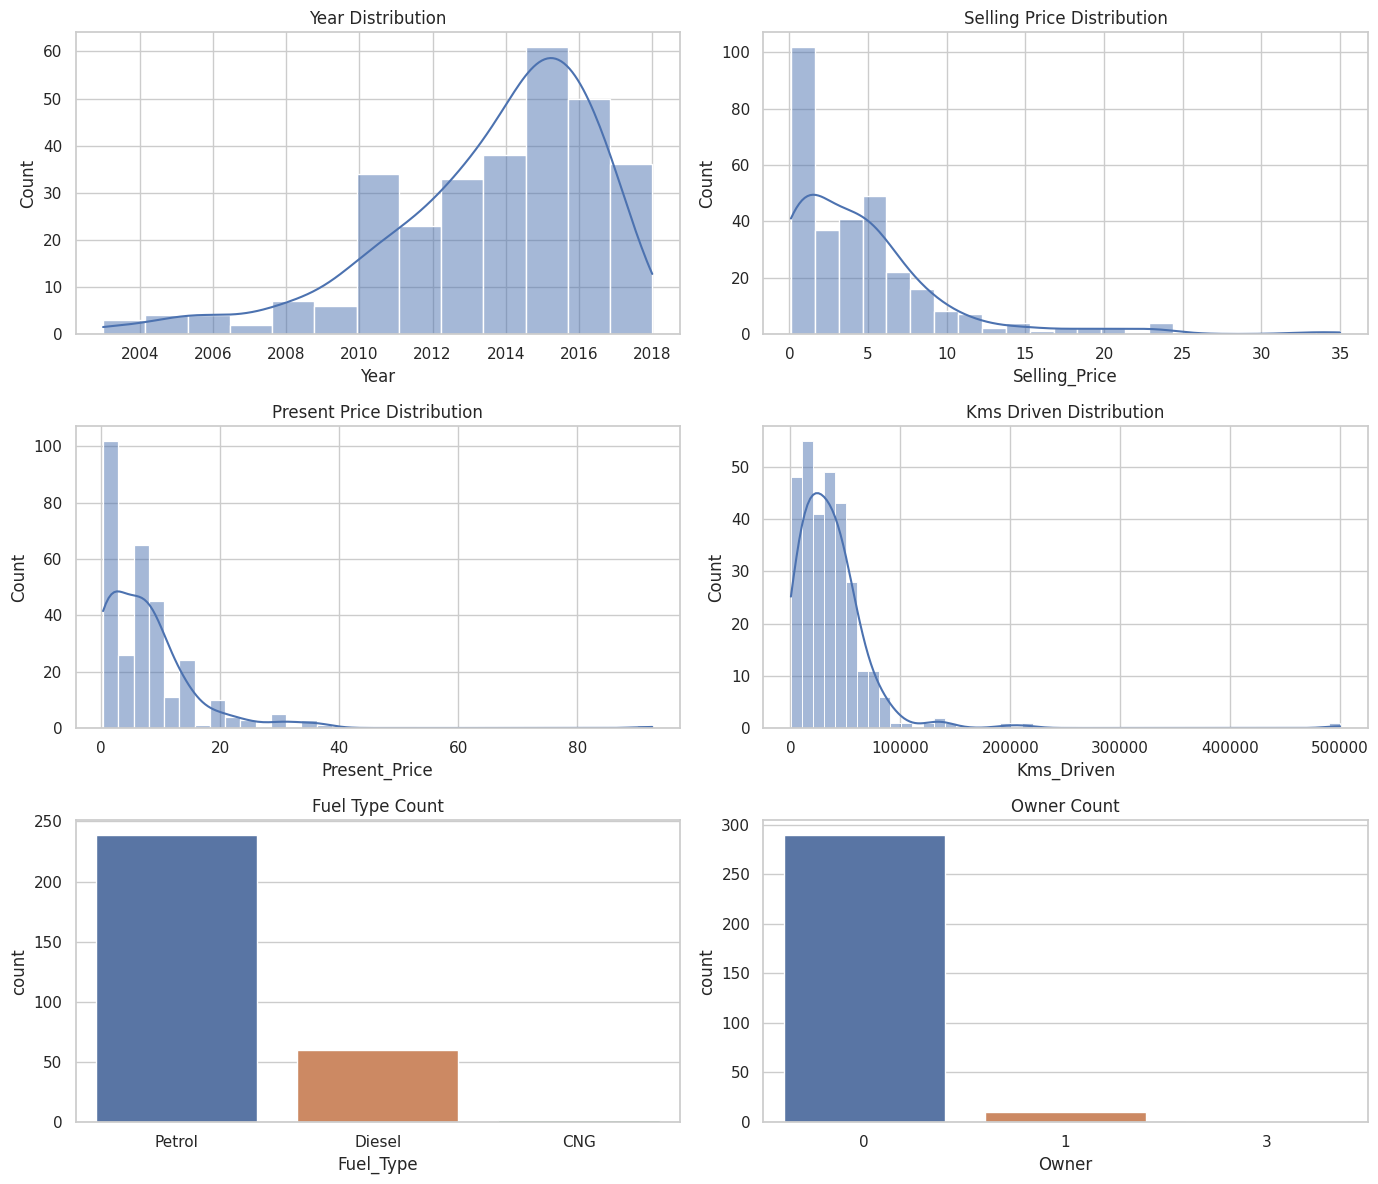

In [ ]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Numerical features for histograms
num_features = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']

# Plotting histograms for numerical features
for i, col in enumerate(num_features):
    sns.histplot(Car_data[col], kde=True, ax=axes[i//2, i%2])

# Count plot for categorical features
sns.countplot(data=Car_data, x='Fuel_Type', ax=axes[2, 0])
sns.countplot(data=Car_data, x='Owner', ax=axes[2, 1])

# Titles for the plots
axes[0, 0].set_title('Year Distribution')
axes[0, 1].set_title('Selling Price Distribution')
axes[1, 0].set_title('Present Price Distribution')
axes[1, 1].set_title('Kms Driven Distribution')
axes[2, 0].set_title('Fuel Type Count')
axes[2, 1].set_title('Owner Count')

plt.tight_layout()
plt.show()

<ipython-input-55-0148aa30ef39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Car_data.corr()


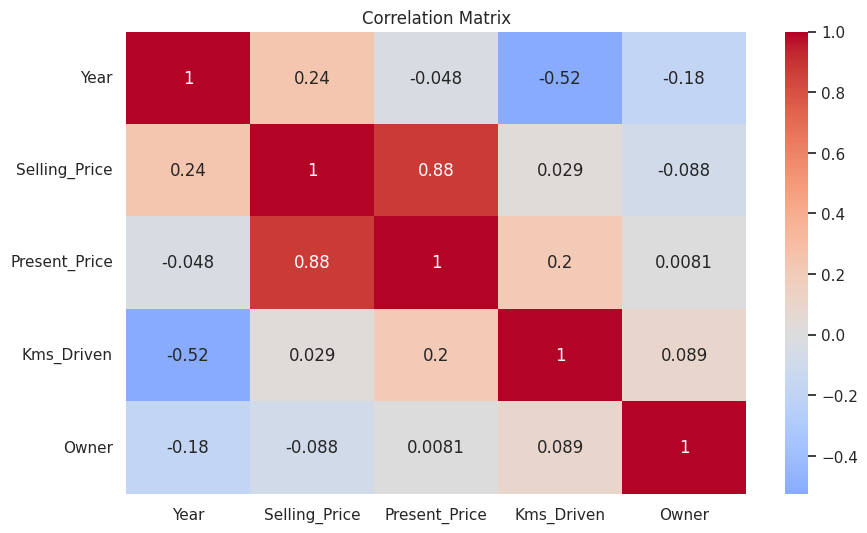

In [ ]:
correlation_matrix = Car_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

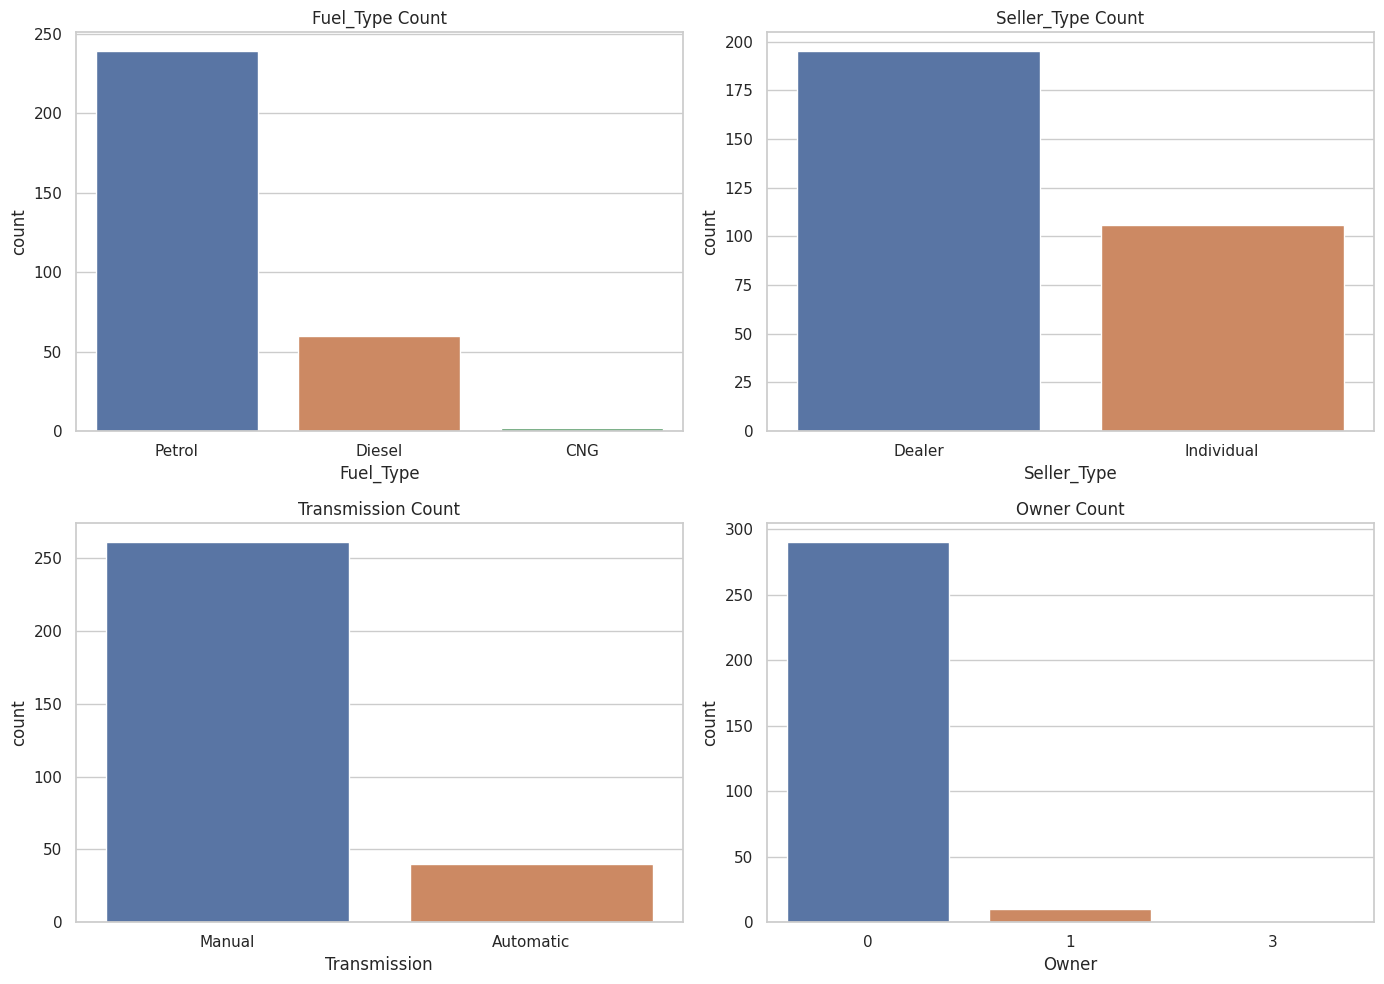

In [ ]:
# Creating subplots for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# List of categorical features
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Plotting count plots for categorical features
for i, col in enumerate(cat_features):
    sns.countplot(data=Car_data, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} Count')

plt.tight_layout()
plt.show()

# Preparing Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

In [ ]:
# Đổi cột năm thành cột tuổi thọ xe
Car_data['Car_Age'] = 2023 - Car_data['Year']
Car_data.drop('Year', axis=1, inplace=True)

In [ ]:
# encoding "Fuel_Type" Column
Car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
Car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
Car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
# Chuẩn bị các biến đầu vào và biến target
X = Car_data.drop('Selling_Price', axis=1)
y = Car_data['Selling_Price']
# Xác định các cột cần được chuyển đổi
categorical_features = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
numerical_features = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Bundle transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the transformations
X_processed = preprocessor.fit_transform(X)


In [ ]:
# Chia tập dữ liệu để train và test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((240, 109), (61, 109))

# Essemble

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Chuẩn bị các mô hình cần thiết
model1 = DecisionTreeRegressor(random_state=0)
model2 = KNeighborsRegressor(n_neighbors=3)
model3 = SVR(kernel='linear')

In [ ]:
# Tạo ra mô hình tập hợp từ 3 mô hình trên
ensemble = VotingRegressor(estimators=[('dt', model1), ('knn', model2), ('svr', model3)])



In [ ]:
# Train dữ liệu
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor(random_state=0)),
                            ('knn', KNeighborsRegressor(n_neighbors=3)),
                            ('svr', SVR(kernel='linear'))])

In [ ]:
# Dự đoán
y_pred = ensemble.predict(X_test)

In [ ]:
# đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1.256897162873749, 0.9502756924402688)

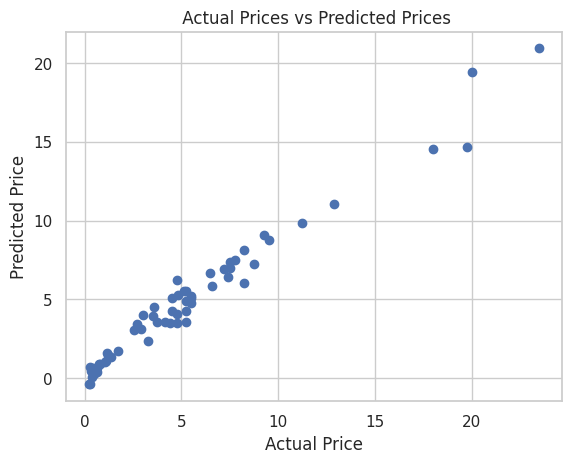

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Feed Forward Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [ ]:
# Model building
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Add Dropout class to avoid overfitting
model.add(Dropout(0.1))  
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))  
# The output is the selling price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Detecting Overfitting

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Set early stop condition
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
X_train_dense = X_train.toarray()
history = model.fit(X_train_dense, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set


Epoch 1/100
6/6 [==============================] - 0s 33ms/step - loss: 0.5374 - val_loss: 0.7213
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.7358 - val_loss: 0.8155
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 0.5706 - val_loss: 0.8648
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6756 - val_loss: 0.7493
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.8674 - val_loss: 0.6968
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5195 - val_loss: 0.7702
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5616 - val_loss: 0.8141
Epoch 8/100
6/6 [==============================] - 0s 17ms/step - loss: 0.4412 - val_loss: 0.8927
Epoch 9/100
6/6 [==============================] - 0s 19ms/step - loss: 0.7020 - val_loss: 0.8311
Epoch 10/100
6/6 [==============================] - 0s 26ms/step - loss: 0.4439 - val_loss: 0.7443


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               14080     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 22401 (87.50 KB)
Trainable params: 22401 (87.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 11ms/step


In [ ]:
# Calculate numbering values
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.0075596999938332
Root Mean Squared Error: 1.0037727332388708
R-squared: 0.9601397712659836


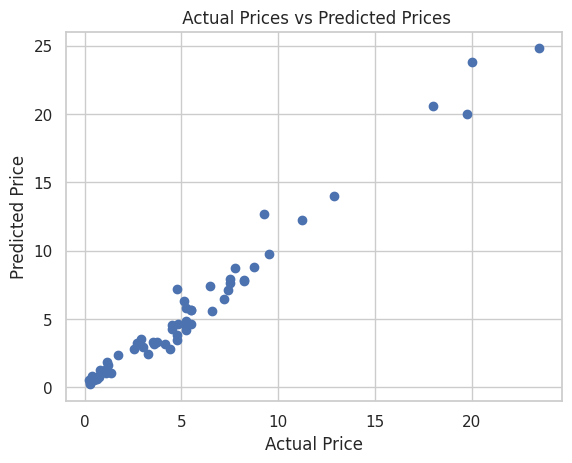

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()